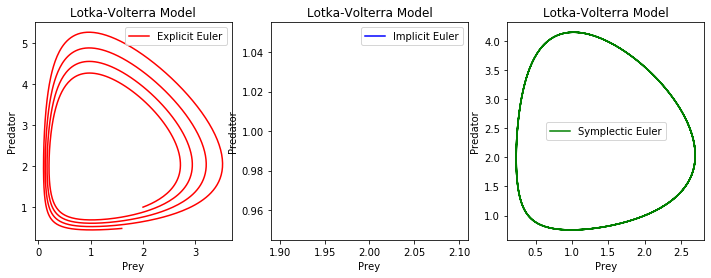

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra equations
def lotka_volterra(u, v, a=2, b=1):
    return np.array([u*(a - v), -v*(b - u)])

# Explicit Euler method
def euler_explicit(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i])
    return y

# Implicit Euler method
def euler_implicit(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i+1], t[i+1])
    return y

# Symplectic Euler method
def euler_symplectic(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        u = y[i,0]
        v = y[i,1]
        u_next = u + (t[i+1] - t[i]) * u * (2 - v)
        v_next = v + (t[i+1] - t[i]) * v * (u_next - 1)
        y[i+1] = np.array([u_next, v_next])
    return y

# Set parameters
a = 2
b = 1
y0 = np.array([2, 1])
t = np.linspace(0, 20, 1000)

# Solve using different methods
y_explicit = euler_explicit(lambda y, t: lotka_volterra(y[0], y[1], a, b), y0, t)
y_implicit = euler_implicit(lambda y, t: lotka_volterra(y[0], y[1], a, b), y0, t)
y_symplectic = euler_symplectic(lotka_volterra, y0, t)

# Plot solutions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Explicit Euler
axs[0].plot(y_explicit[:,0], y_explicit[:,1], 'r', label='Explicit Euler')
axs[0].set_xlabel('Prey')
axs[0].set_ylabel('Predator')
axs[0].set_title('Lotka-Volterra Model')
axs[0].legend()

# Implicit Euler
axs[1].plot(y_implicit[:,0], y_implicit[:,1], 'b', label='Implicit Euler')
axs[1].set_xlabel('Prey')
axs[1].set_ylabel('Predator')
axs[1].set_title('Lotka-Volterra Model')
axs[1].legend()

# Symplectic Euler
axs[2].plot(y_symplectic[:,0], y_symplectic[:,1], 'g', label='Symplectic Euler')
axs[2].set_xlabel('Prey')
axs[2].set_ylabel('Predator')
axs[2].set_title('Lotka-Volterra Model')
axs[2].legend()

plt.show()